In [1]:
import skimage.io as io
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
images=io.imread("Frame_62_89.tif")
nr,nc=images[0,:,:].shape

In [3]:
Traj=pd.read_csv('Trajectories.csv')

In [4]:
Traj.shape

(91446, 11)

In [5]:
Traj_selected=Traj.groupby("Trajectory").filter(lambda x: len(x["Frame"])>3)

In [6]:
Traj_selected.shape

(84191, 11)

In [7]:
def displacement_per_frame(Traj,ax):
    X=Traj['x'].values
    Y=Traj['y'].values
    dist_x=(X[:-1]-X[1:])
    dist_y=(Y[:-1]-Y[1:])
    dist=np.sqrt(dist_x**2+dist_y**2)
    ax.scatter(dist_x,dist_y)
    #print(dist_x,dist_y)
    

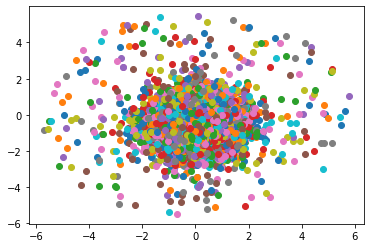

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1)
for name, traj in Traj_selected.groupby("Trajectory"):
     displacement_per_frame(traj,ax)
    